(39717, 45)

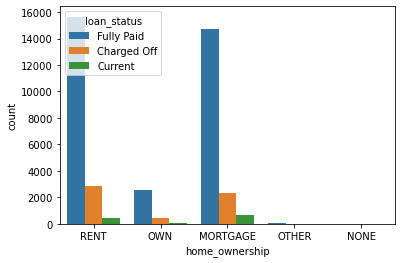

In [2]:
#!/usr/bin/env python
# coding: utf-8
# # Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings as ws
ws.filterwarnings('ignore')
df=pd.read_csv('../Data_Source/loan.csv')
df.shape
100*df.isnull().mean()[df.isnull().mean()==1]
empty_column=df.isnull().mean()[100*df.isnull().mean()==100].keys()
empty_column
df1=df.drop(columns=empty_column)
df1.shape
100*df1.isnull().mean().sort_values(ascending=False)
df1=df1.drop(columns=[])
100*df1.isnull().mean(axis=1).sort_values(ascending=False)
df1.drop_duplicates().shape
num_col=df1.dtypes[(df1.dtypes=='int64') | (df1.dtypes=='float64')]
str_col=df1.dtypes[~((df1.dtypes=='int64') | (df1.dtypes=='float64'))]
df1['int_rate']=df1['int_rate'].apply(lambda x: x.replace('%',''))
df1['zip_code']=df1['zip_code'].apply(lambda x: x.replace('xx',''))
df1['zip_code']=pd.to_numeric(df1['zip_code'])
df1['sub_grade']=df1['sub_grade'].apply(lambda x: x[-1])
df1['revol_util']=df1['revol_util'].apply(lambda x: np.nan if pd.isna(x) else x.replace('%',''))
df1['int_rate']=df1['int_rate'].str.strip().astype(float)
df1['revol_util']=df1['revol_util'].str.strip().astype(float)
str_col.keys()
df1=df1.drop(columns=['mths_since_last_record','next_pymnt_d','application_type'
                      ,'collections_12_mths_ex_med'
                      ,'url','chargeoff_within_12_mths','tax_liens'
                      ,'delinq_amnt','acc_now_delinq','policy_code'
                      ,'pymnt_plan','initial_list_status'])
df1.shape
df1.columns
df2=df1
df2['title']=df1['title'].fillna('UNKNOWNXXX')
df2[df2['title'].str.contains('debt consolidation',case=False)]['title'].value_counts()
df2.loc[df2['title'].str.contains('personal loan',case=False),'title']='Personal Loan'
df2.loc[df2['title'].str.contains('Debt Consolidation',case=False),'title']='Debt Consolidation'
df2.loc[df2['title'].str.contains('Consolidate Debt',case=False),'title']='Debt Consolidation'
df2.loc[df2['title'].str.contains('Consolidation Loan',case=False),'title']='Debt Consolidation'
df2.loc[df2['title'].str.contains('debt_consolidation',case=False),'title']='Debt Consolidation'
df2.loc[df2['title'].str.contains('Debt Payoff',case=False),'title']='Debt Consolidation'
df2.loc[df2['title'].str.contains('Dept Consolidation',case=False),'title']='Debt Consolidation'
df2.loc[df2['title'].str.contains('Loan Consolidation',case=False),'title']='Debt Consolidation'
df2.loc[df2['title'].str.contains('credit consolidation',case=False),'title']='Debt Consolidation'
df2.loc[df2['title'].str.contains('credit card loan',case=False),'title']='Credit Card Loan'
df2.loc[df2['title'].str.contains('Credit Card Payoff',case=False,regex=True),'title']='Credit Card Loan'
df2.loc[df2['title'].str.contains(r'\b(?:credit.*card.*debt)\b',case=False,regex=True),'title']='Credit Card Loan'
df2.loc[df2['title'].str.contains('CC Consolidation',case=False),'title']='Credit Card Loan'
df2.loc[df2['title'].str.contains('Credit Card Consolidation',case=False),'title']='Credit Card Loan'
df2.loc[df2['title'].str.contains('Credit Card Refinance',case=False),'title']='Credit Card Loan'
df2.loc[df2['title'].str.contains('cc payoff',case=False),'title']='Credit Card Loan'
df2.loc[df2['title'].str.contains('Payoff Credit Cards',case=False),'title']='Credit Card Loan'
df2.loc[df2['title'].str.contains(r'\b(?:credit.*card.*consolidation)\b',case=False,regex=True),'title']='Credit Card Consolidation'
df2.loc[df2['title'].str.lower()=='debt','title']='Debt'
df2['title'].value_counts().head(50)
sns.countplot(data=df1,hue='loan_status',x='home_ownership')
df1['loan_status'].value_counts()/df1.shape[0]*100
df1_bad=df1[df1['loan_status']=='Charged Off']
df1_good=df1[df1['loan_status']=='Fully Paid']
df1_bad['home_ownership'].value_counts()/5627*100 , df1_good['home_ownership'].value_counts()/32950*100 
df1_bad['grade'].value_counts()/5627*100 , df1_good['grade'].value_counts()/32950*100 
df1_a=df1[['grade','loan_status']].value_counts().reset_index()
df1_b=df1['grade'].value_counts().reset_index()
df3=df1_a.merge(df1_b,how='left',left_on='grade',right_on='index').sort_values('grade_x')
df3.rename(columns={0:'sub_count'},inplace=True)
df3['perc']=(df3['sub_count']/df3['grade_y'])*100
14694+2327+638
df3
ordered_cat=['term','grade','sub_grade','emp_length','issue_d','delinq_2yrs'
             ,'earliest_cr_line','inq_last_6mths','mths_since_last_delinq',
             'last_pymnt_d','last_credit_pull_d','pub_rec_bankruptcies']
unordered_cat=['home_ownership','verification_status','loan_status','purpose',
               'zip_code','addr_state','emp_title','title']
other=['id','member_id','desc']
measure_col=['loan_amnt', 'funded_amnt','funded_amnt_inv','int_rate',
             'installment','annual_inc','dti','open_acc','pub_rec','revol_bal'
             ,'revol_util','total_acc','out_prncp','total_pymnt'
             ,'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee'
             ,'recoveries','collection_recovery_fee','last_pymnt_amnt']
df1['pub_rec_bankruptcies'].unique()

df1.shape

In [2]:
df1_bad.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [6]:
df1_bad['int_rate'].describe()

count    5627.000000
mean       13.820432
std         3.654413
min         5.420000
25%        11.310000
50%        13.610000
75%        16.400000
max        24.400000
Name: int_rate, dtype: float64

In [7]:
df1_good['int_rate'].describe()

count    32950.000000
mean        11.609761
std          3.599964
min          5.420000
25%          8.490000
50%         11.490000
75%         13.990000
max         24.110000
Name: int_rate, dtype: float64

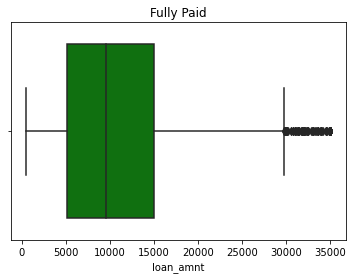

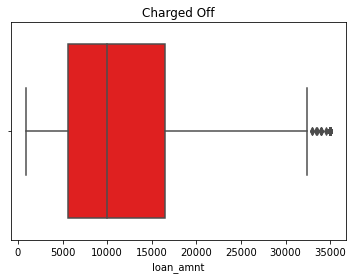

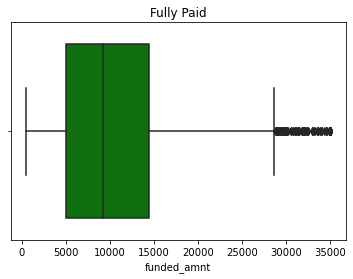

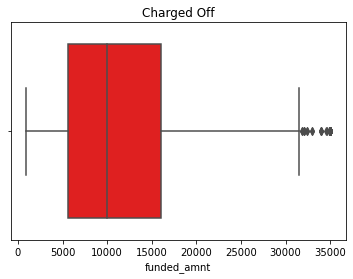

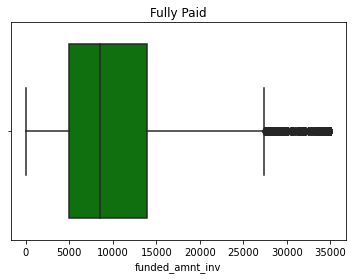

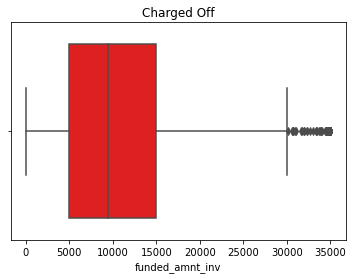

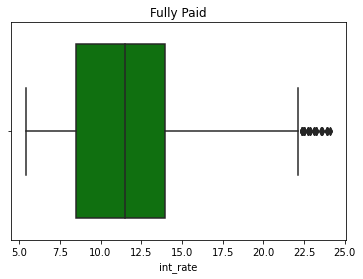

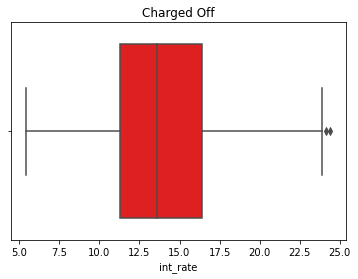

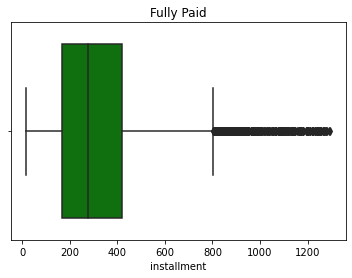

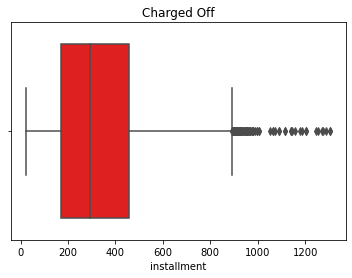

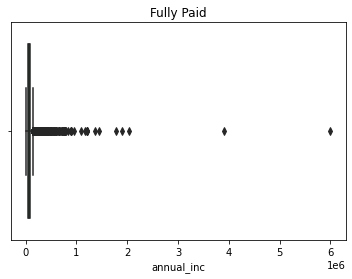

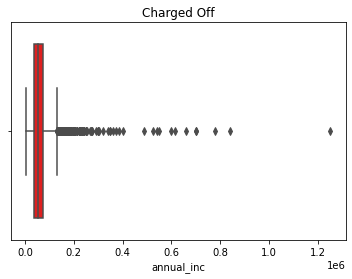

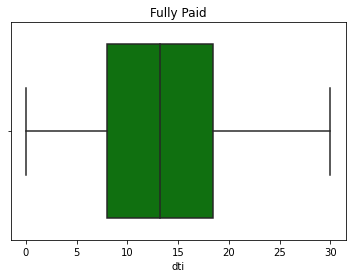

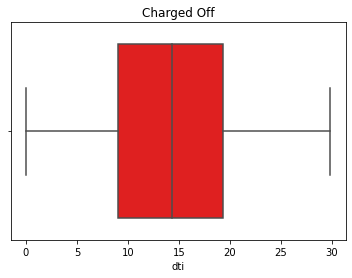

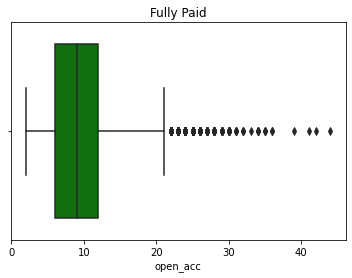

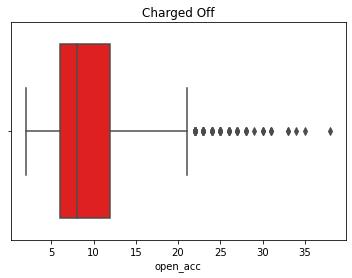

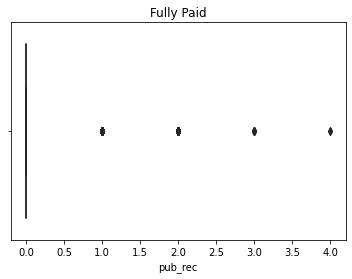

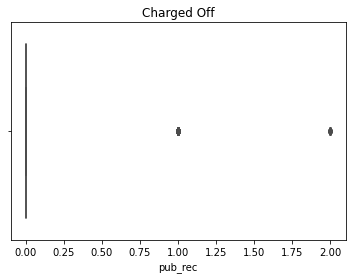

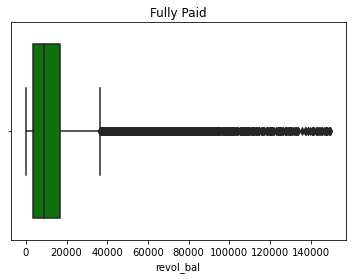

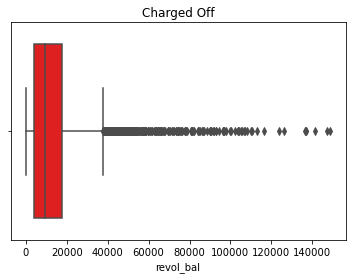

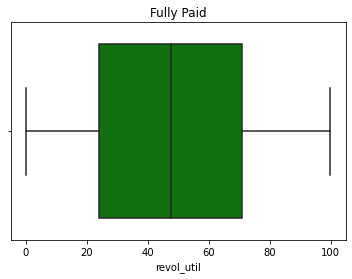

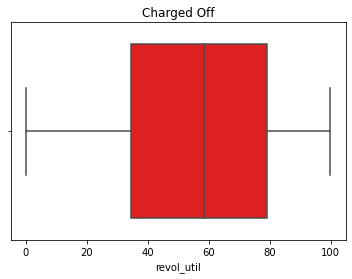

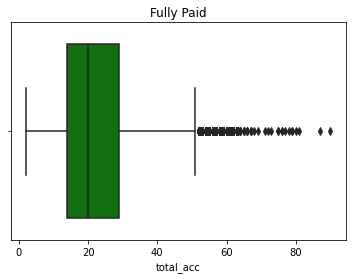

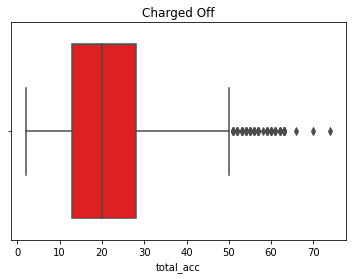

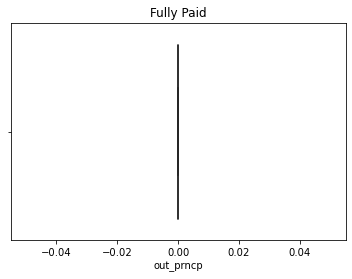

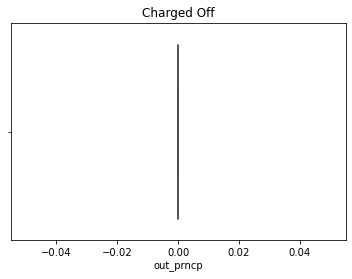

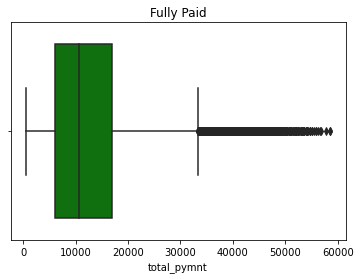

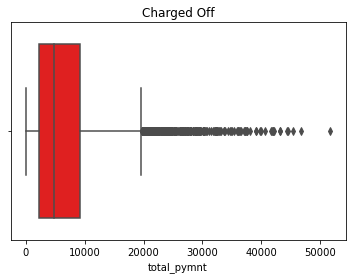

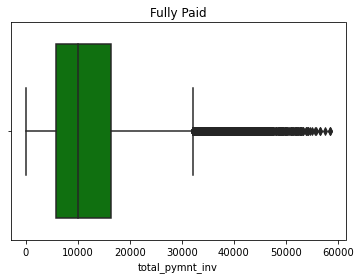

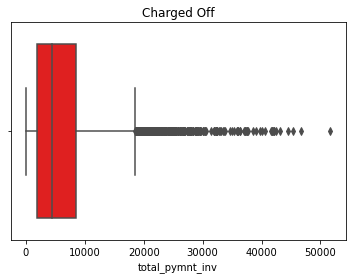

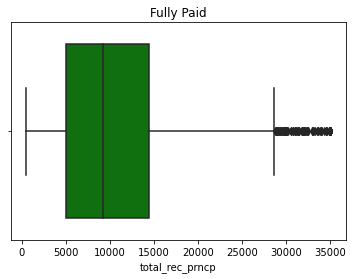

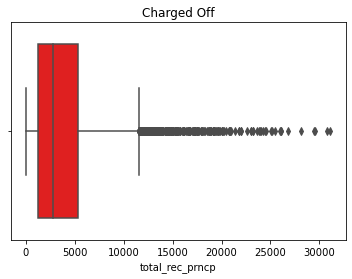

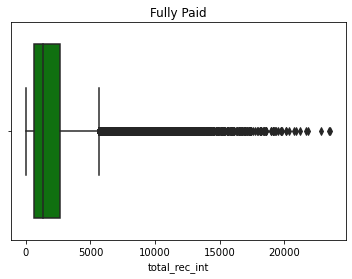

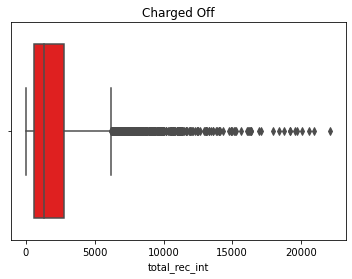

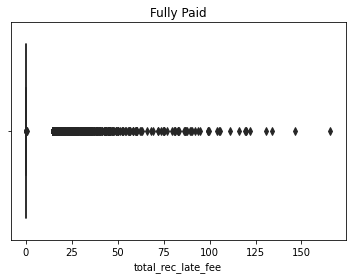

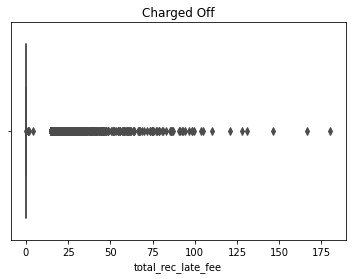

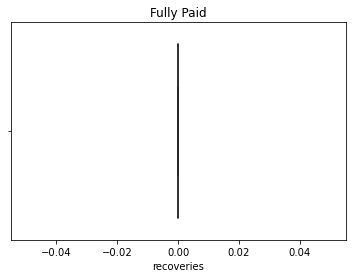

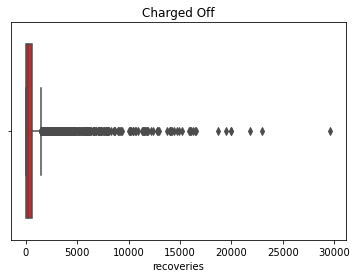

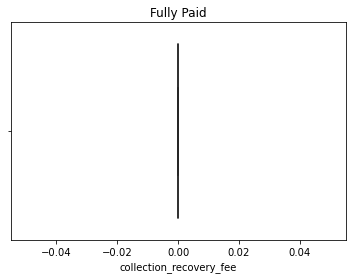

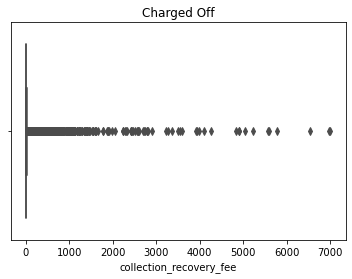

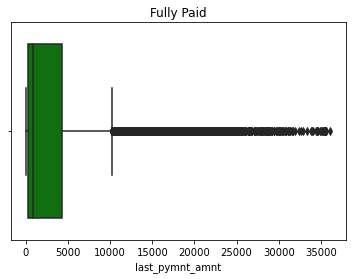

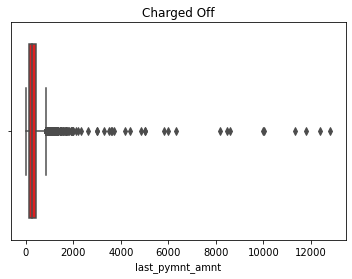

In [5]:
for i in measure_col:
    sns.boxplot(x=df1_good[i],color='green',)
    plt.title('Fully Paid')
    plt.show()
    sns.boxplot(x=df1_bad[i],color='red')
    plt.title('Charged Off')
    plt.show()


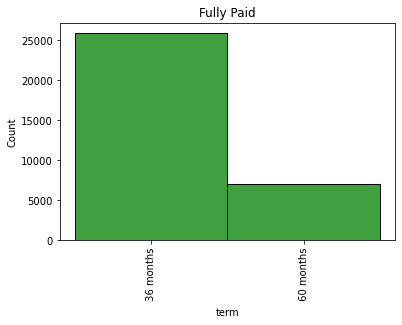

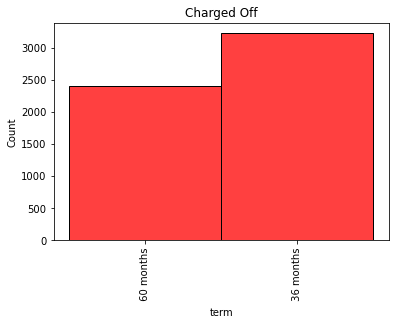

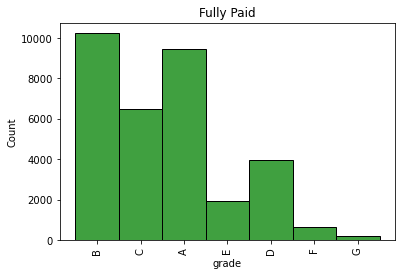

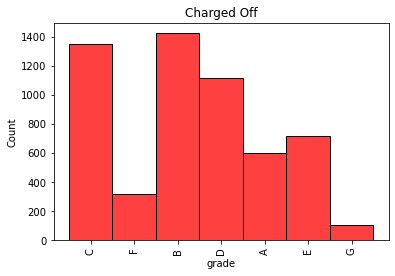

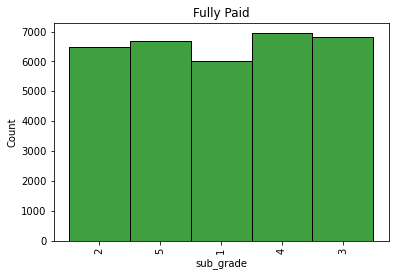

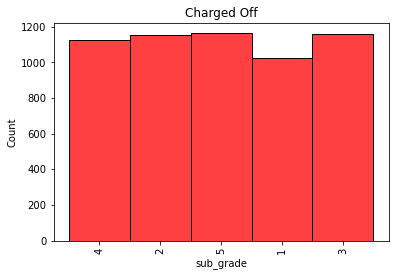

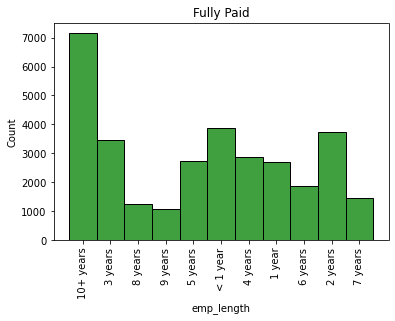

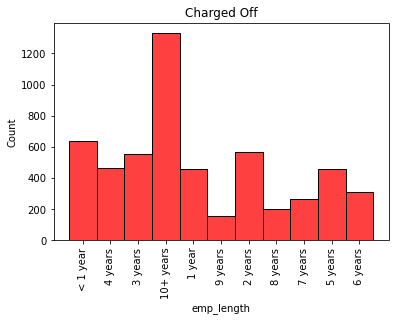

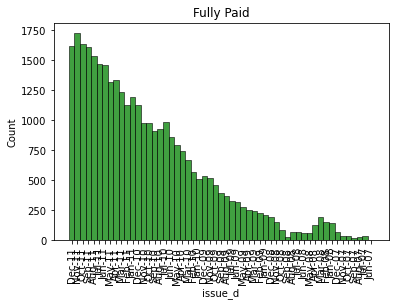

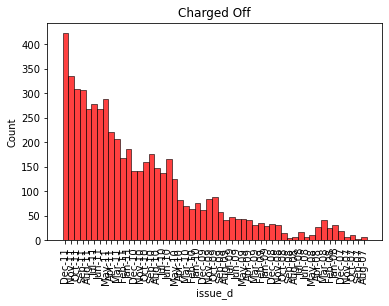

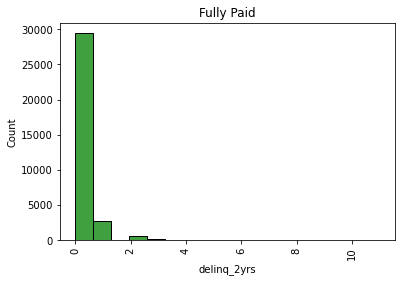

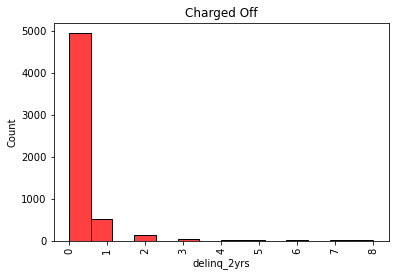

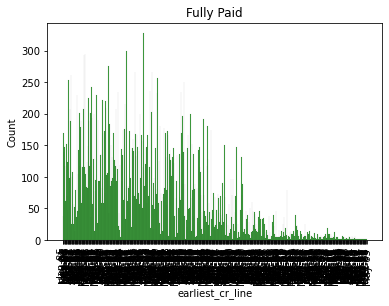

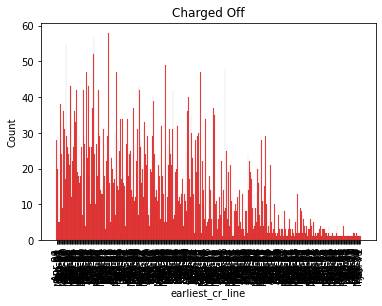

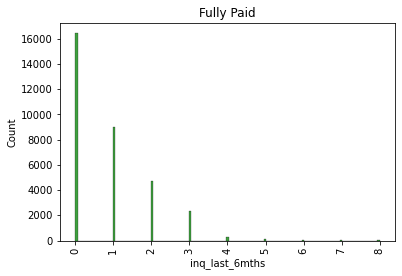

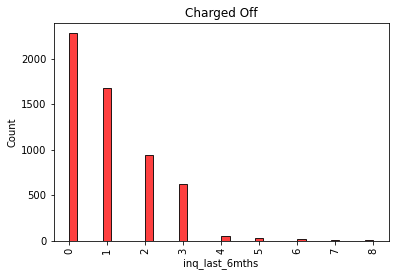

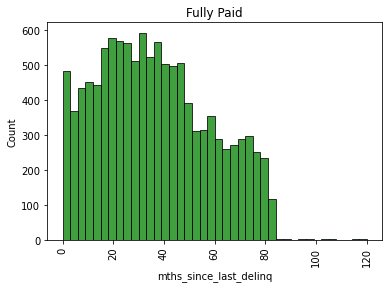

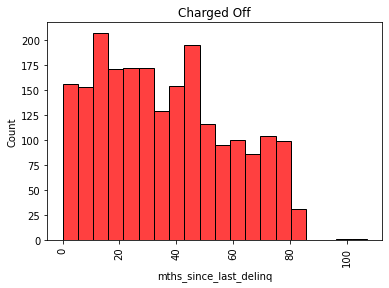

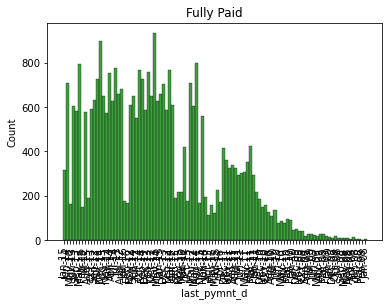

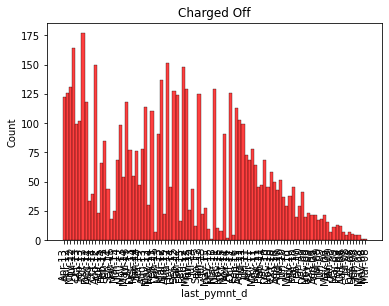

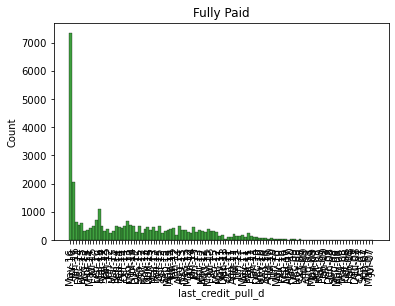

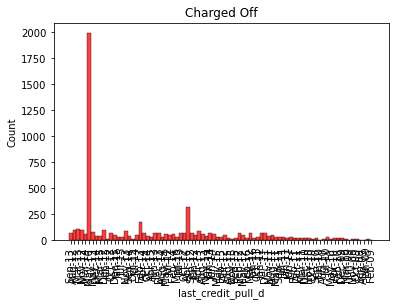

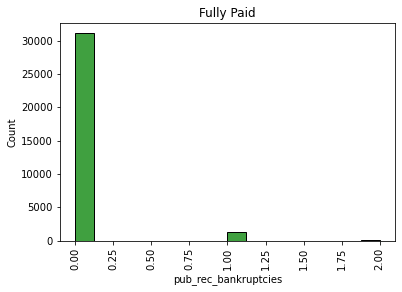

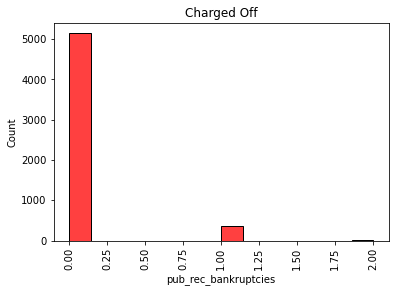

In [14]:
for i in ordered_cat:
    sns.histplot(x=df1_good[i],color='green',)
    plt.title('Fully Paid')
    plt.xticks(rotation=90)
    plt.show()
    sns.histplot(x=df1_bad[i],color='red')
    plt.title('Charged Off')
    plt.xticks(rotation=90)
    plt.show()

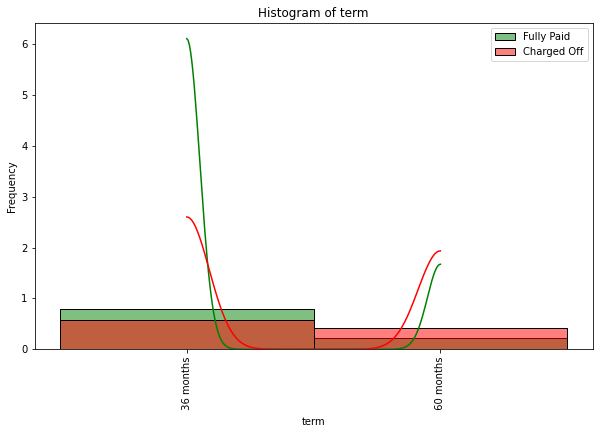

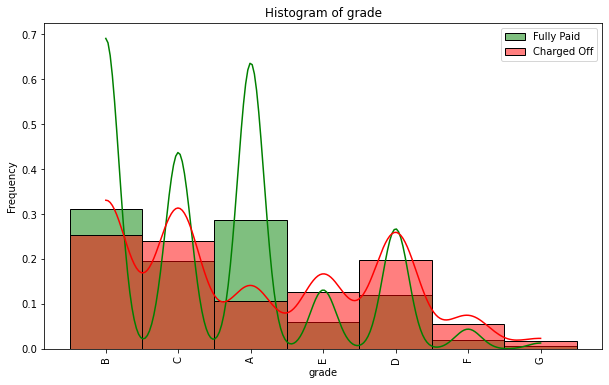

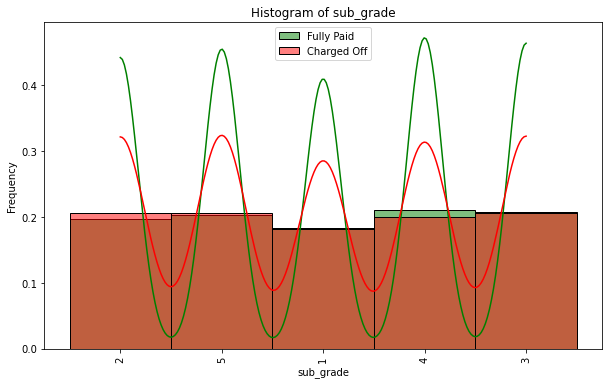

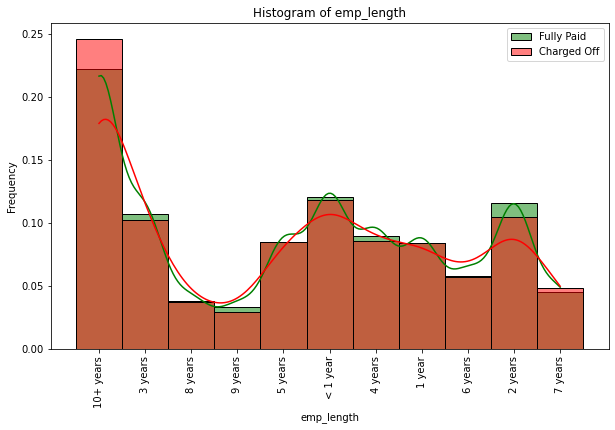

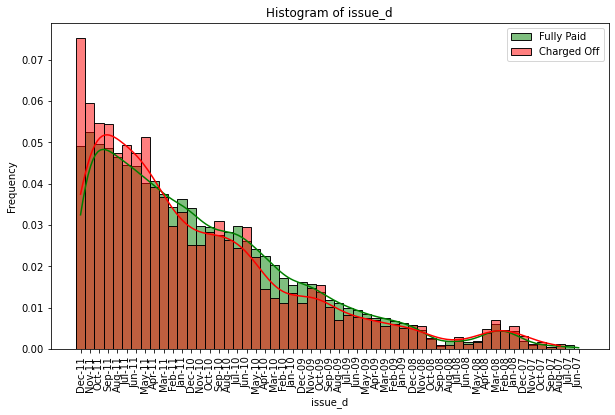

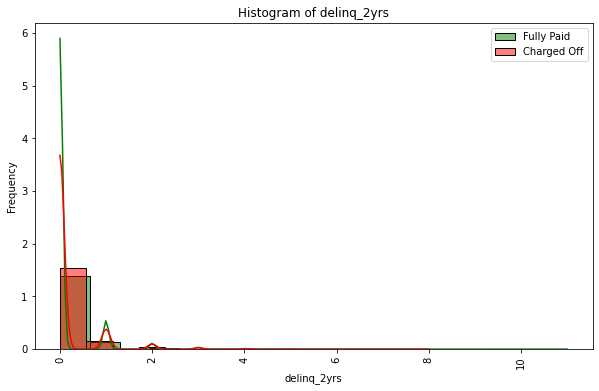

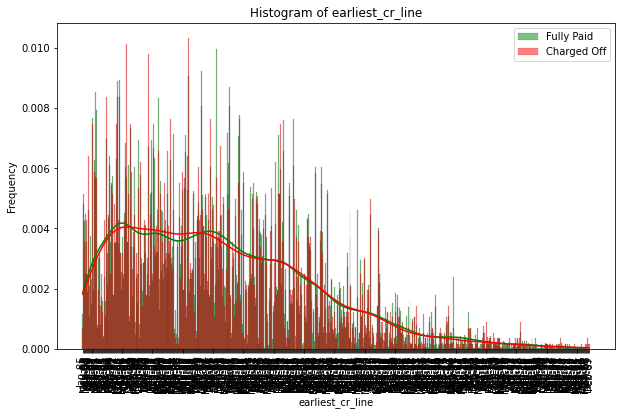

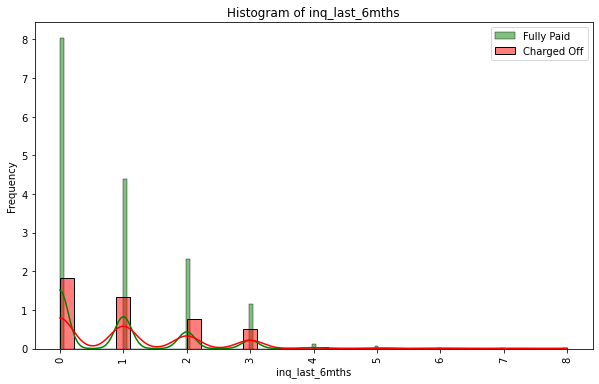

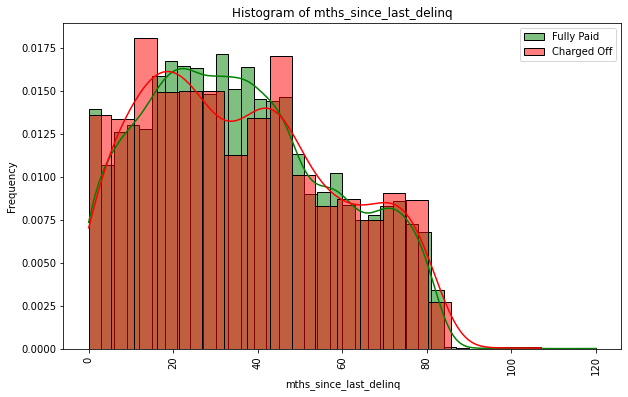

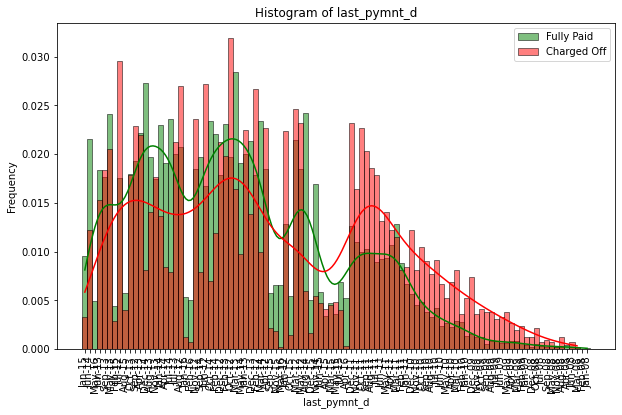

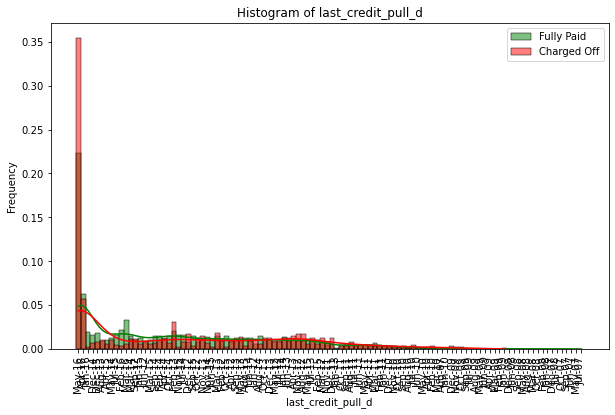

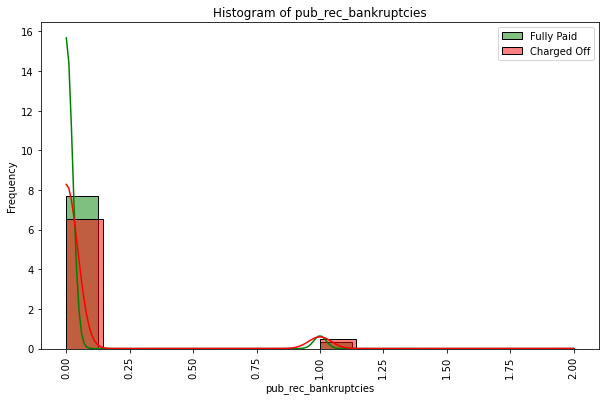

In [21]:
for i in ordered_cat:
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    
    # Plot histogram for 'Fully Paid' group
    sns.histplot(x=df1_good[i], color='green', kde=True, label='Fully Paid',stat='density')
    
    # Plot histogram for 'Charged Off' group
    sns.histplot(x=df1_bad[i], color='red', kde=True, label='Charged Off',stat='density')
    
    plt.title(f'Histogram of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  # Rotate x-axis labels if needed
    plt.legend()  # Add legend
    
    plt.show()

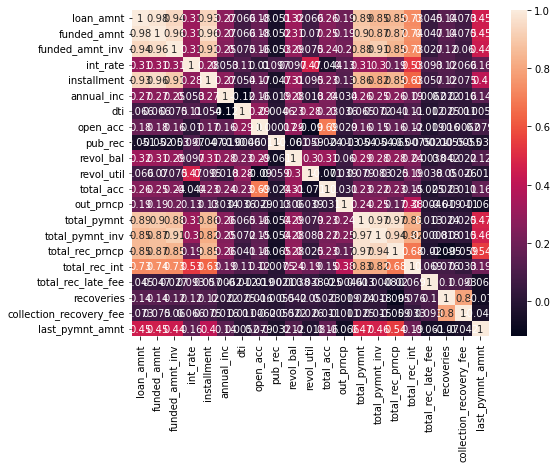

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(df1[measure_col].corr(),annot=True)
plt.show()

In [27]:
df1.pivot_table(columns=['home_ownership','loan_status'],aggfunc=['median'],values=measure_col)

median                                          \
home_ownership             MORTGAGE                                    NONE   
loan_status             Charged Off    Current    Fully Paid     Fully Paid   
annual_inc               64800.0000  74002.000  72000.000000  100000.000000   
collection_recovery_fee      2.5302      0.000      0.000000       0.000000   
dti                         14.3300     14.965     12.920000      15.000000   
funded_amnt              12000.0000  17000.000  10000.000000    4000.000000   
funded_amnt_inv          11500.0000  16750.000   9950.000000    1625.000000   
installment                339.6900    398.080    307.830000     128.410000   
int_rate                    13.4900     13.990     11.030000       8.700000   
last_pymnt_amnt            264.3900    399.155   1193.700000     129.760000   
loan_amnt                12000.0000  18000.000  10000.000000    4000.000000   
open_acc                    10.0000     10.000     10.000000       6.000000   
out_prncp                    0.0000   1635.555      0.000000       0.000000   
pub_rec                      0.0000      0.000      0.000000       0.000000   
recoveries                 153.2100      0.000      0.000000       0.000000   
revol_bal                12546.0000  15090.500  11006.000000    8155.000000   
revol_util                  57.4000     51.950     44.100000      14.900000   
total_acc                   25.0000     25.000     25.000000       8.000000   
total_pymnt               5728.6800  22222.360  11795.715865    4622.489229   
total_pymnt_inv           5222.6600  21777.475  11210.960000    1852.050000   
total_rec_int             1633.2700   6977.825   1431.120000     622.490000   
total_rec_late_fee           0.0000      0.000      0.000000       0.000000   
total_rec_prncp           3292.8400  15228.075  10000.000000    4000.000000   

                                                                           \
home_ownership                  OTHER                       OWN             
loan_status               Charged Off    Fully Paid Charged Off   Current   
annual_inc               58750.000000  60000.000000    45000.00  49000.00   
collection_recovery_fee      3.755000      0.000000        2.57      0.00   
dti                         12.065000     10.330000       14.83     14.60   
funded_amnt              12500.000000   7875.000000     9275.00  13000.00   
funded_amnt_inv          11167.890000   5928.580100     8000.00  13000.00   
installment                439.705000    257.885000      257.43    292.52   
int_rate                    12.210000     11.830000       13.49     14.27   
last_pymnt_amnt            386.425000    363.715000      236.90    304.33   
loan_amnt                14000.000000   8500.000000     9600.00  13200.00   
open_acc                     9.500000      8.000000        8.00      8.00   
out_prncp                    0.000000      0.000000        0.00   1010.41   
pub_rec                      0.000000      0.000000        0.00      0.00   
recoveries                  35.365000      0.000000      185.34      0.00   
revol_bal                11613.000000   8618.500000     7061.00   8646.00   
revol_util                  33.500000     39.300000       54.70     41.50   
total_acc                   24.000000     19.000000       17.00     18.00   
total_pymnt               5942.854242   9207.683749     4313.27  17054.89   
total_pymnt_inv           4103.425000   7009.255000     3766.11  17054.89   
total_rec_int             1398.885000   1404.145000     1093.26   4641.61   
total_rec_late_fee           0.000000      0.000000        0.00      0.00   
total_rec_prncp           4080.705000   7874.995000     2435.96  11835.15   

                                                                          
home_ownership                               RENT                         
loan_status                Fully Paid Charged Off   Current   Fully Paid  
annual_inc               49000.000000    45000.00  53100.0

In [26]:
df1_good.pivot_table(columns=['loan_status','home_ownership'],aggfunc=['median'],values=measure_col)

median                               \
loan_status                Fully Paid                                
home_ownership               MORTGAGE           NONE         OTHER   
annual_inc               72000.000000  100000.000000  60000.000000   
collection_recovery_fee      0.000000       0.000000      0.000000   
dti                         12.920000      15.000000     10.330000   
funded_amnt              10000.000000    4000.000000   7875.000000   
funded_amnt_inv           9950.000000    1625.000000   5928.580100   
installment                307.830000     128.410000    257.885000   
int_rate                    11.030000       8.700000     11.830000   
last_pymnt_amnt           1193.700000     129.760000    363.715000   
loan_amnt                10000.000000    4000.000000   8500.000000   
open_acc                    10.000000       6.000000      8.000000   
out_prncp                    0.000000       0.000000      0.000000   
pub_rec                      0.000000       0.000000      0.000000   
recoveries                   0.000000       0.000000      0.000000   
revol_bal                11006.000000    8155.000000   8618.500000   
revol_util                  44.100000      14.900000     39.300000   
total_acc                   25.000000       8.000000     19.000000   
total_pymnt              11795.715865    4622.489229   9207.683749   
total_pymnt_inv          11210.960000    1852.050000   7009.255000   
total_rec_int             1431.120000     622.490000   1404.145000   
total_rec_late_fee           0.000000       0.000000      0.000000   
total_rec_prncp          10000.000000    4000.000000   7874.995000   

                                                    
loan_status                                         
home_ownership                    OWN         RENT  
annual_inc               49000.000000  50000.00000  
collection_recovery_fee      0.000000      0.00000  
dti                         13.170000     13.50000  
funded_amnt               8000.000000   8000.00000  
funded_amnt_inv           7834.646709   7850.00000  
installment                248.890000    254.20000  
int_rate                    11.140000     11.83000  
last_pymnt_amnt            747.645000    687.57000  
loan_amnt                 8000.000000   8000.00000  
open_acc                     8.000000      8.00000  
out_prncp                    0.000000      0.00000  
pub_rec                      0.000000      0.00000  
recoveries                   0.000000      0.00000  
revol_bal                 7234.500000   7265.00000  
revol_util                  40.900000     51.80000  
total_acc                   19.000000     17.00000  
total_pymnt               9377.872041   9596.19225  
total_pymnt_inv           8941.575000   8980.73000  
total_rec_int             1107.080000   1238.15000  
total_rec_late_fee           0.000000      0.00000  
total_rec_prncp           8000.000000   8000.00000

In [28]:
ordered_cat=['term','grade','sub_grade','emp_length','issue_d','delinq_2yrs'
             ,'earliest_cr_line','inq_last_6mths','mths_since_last_delinq',
             'last_pymnt_d','last_credit_pull_d','pub_rec_bankruptcies']
unordered_cat=['home_ownership','verification_status','loan_status','purpose',
               'zip_code','addr_state','emp_title','title']
other=['id','member_id','desc']
measure_col=['loan_amnt', 'funded_amnt','funded_amnt_inv','int_rate',
             'installment','annual_inc','dti','open_acc','pub_rec','revol_bal'
             ,'revol_util','total_acc','out_prncp','total_pymnt'
             ,'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee'
             ,'recoveries','collection_recovery_fee','last_pymnt_amnt']
df1['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

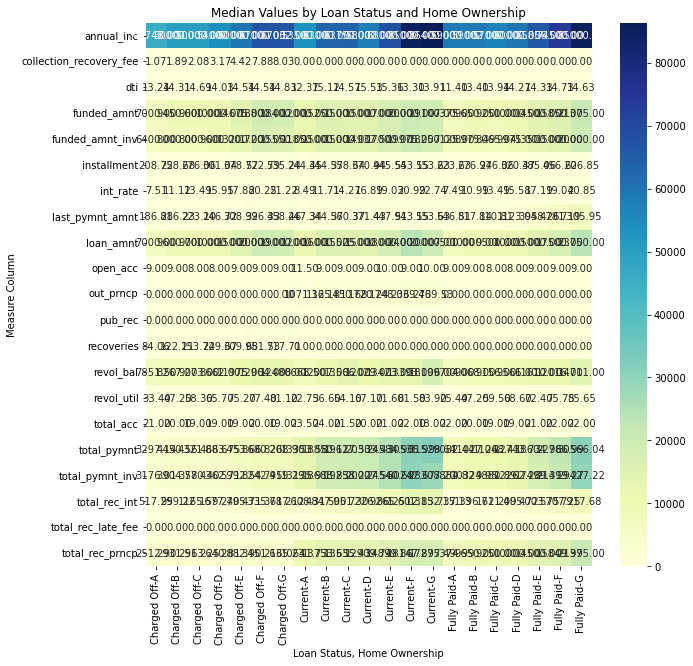

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(df1.pivot_table(columns=['loan_status', 'grade'],
                                  aggfunc='median',
                                  values=measure_col),
            cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Median Values by Loan Status and Home Ownership')
plt.xlabel('Loan Status, Home Ownership')
plt.ylabel('Measure Column')
plt.show()